In [1]:
# import packages
import pandas as pd
import os
import glob
import random
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import matplotlib.patches as mpatches

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import norm

## Data Prep

In [2]:
path = r'/Users/spencersu/Desktop/Efficacy Studies/Archdiocese'
df = pd.read_csv(os.path.join(path, 'Arch 2020-22 growth.csv'))


## clean the columns

df = df.iloc[:,1:]
df = df.rename(columns = {'Student Id [Sensitive]':'student_id', 'Full Name [Sensitive]':'student_name',
                         'School Year':'school_year','School Name':'school_name','Class Grade Level':'grade',
                         'Teacher Name [Sensitive]':'teacher_name','Lesson Type':'lesson_type',
                         'Multiple Choice Score':'reading_score','Word Count In Final Writing':'word_count',
                         'Number of Graded Writing Lessons':'num_graded_writing','Number of Lessons':'num_lesson'})
df['word_count'] = pd.to_numeric(df['word_count'],errors='coerce')

## Boxplots

### District level growth 

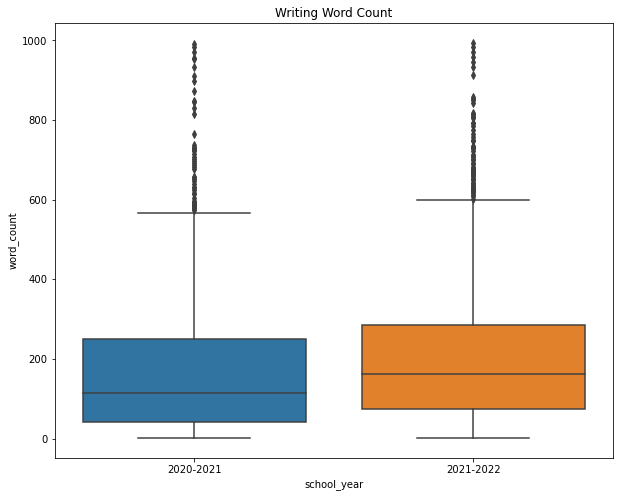

In [3]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x=df['school_year'],y=df['word_count'])
ax.set_title('Writing Word Count')
#     plt.savefig('/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/boxplot grade' + str(n) +'.png')
plt.show()

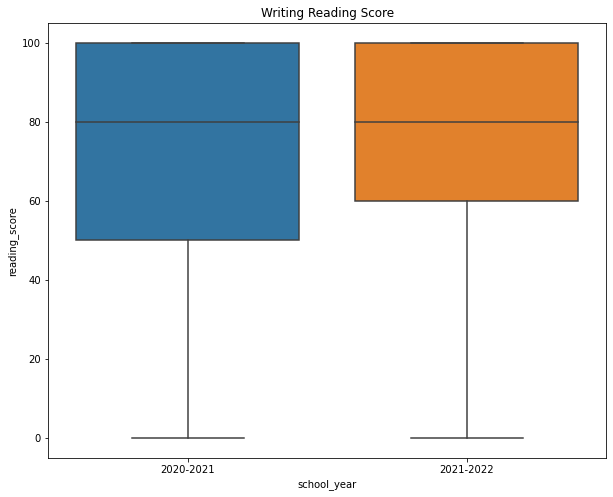

In [4]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x=df['school_year'],y=df['reading_score'])
ax.set_title('Writing Reading Score')
#     plt.savefig('/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/boxplot grade' + str(n) +'.png')
plt.show()

### School level growth

<Figure size 720x576 with 0 Axes>

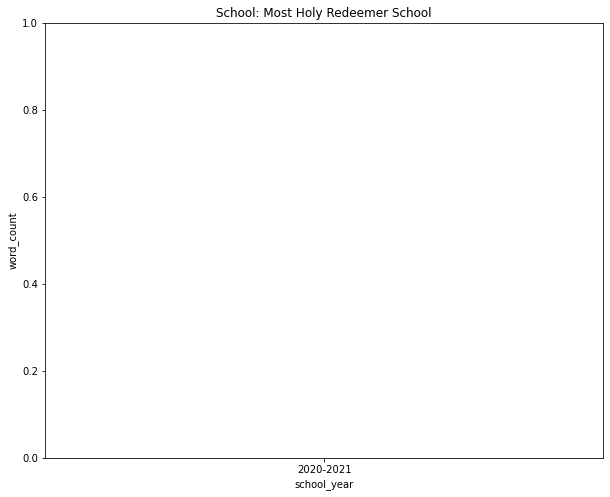

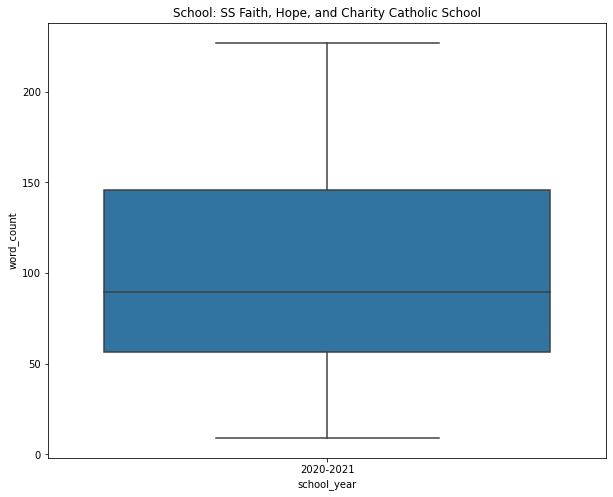

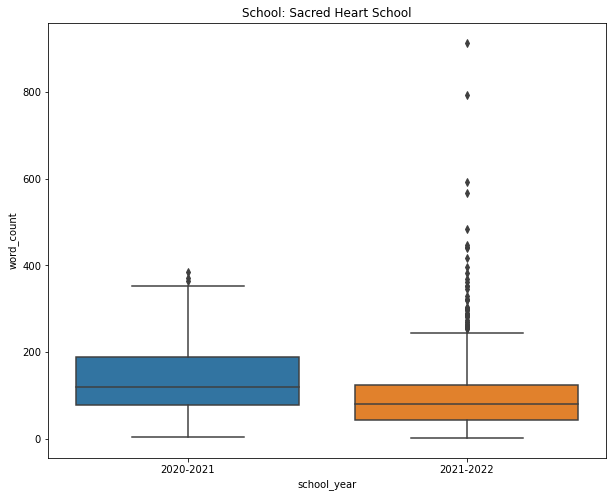

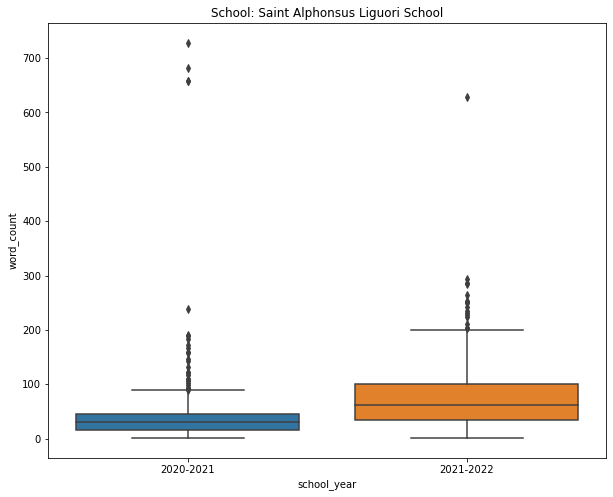

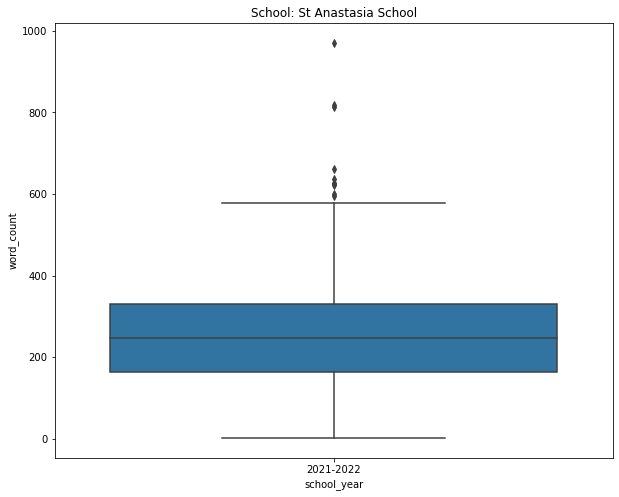

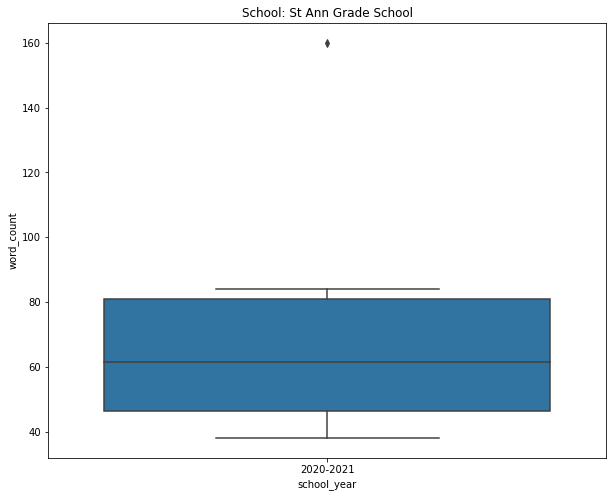

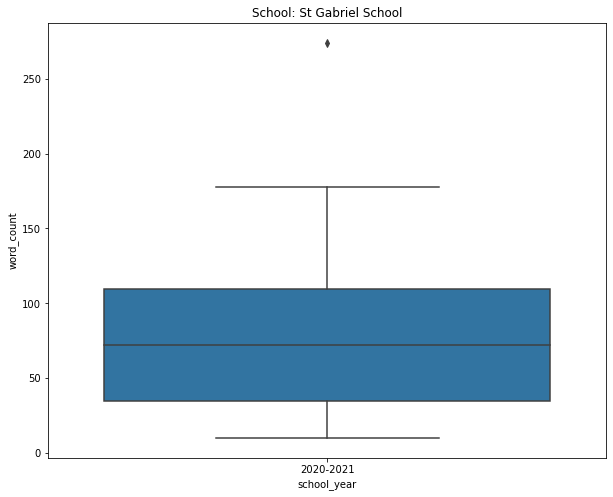

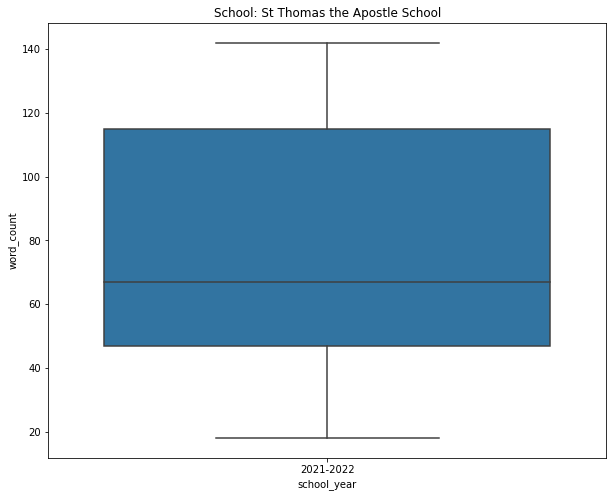

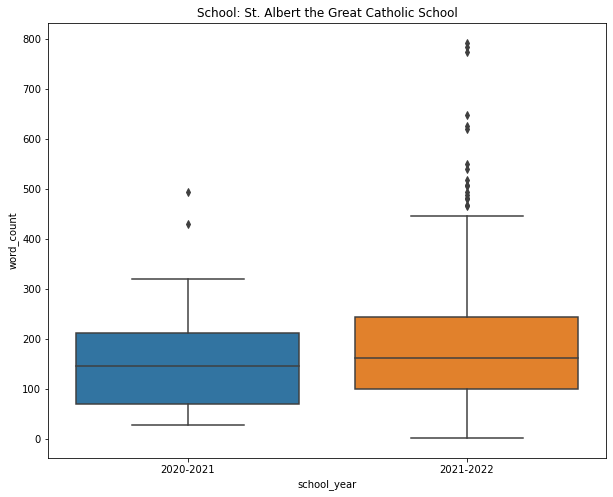

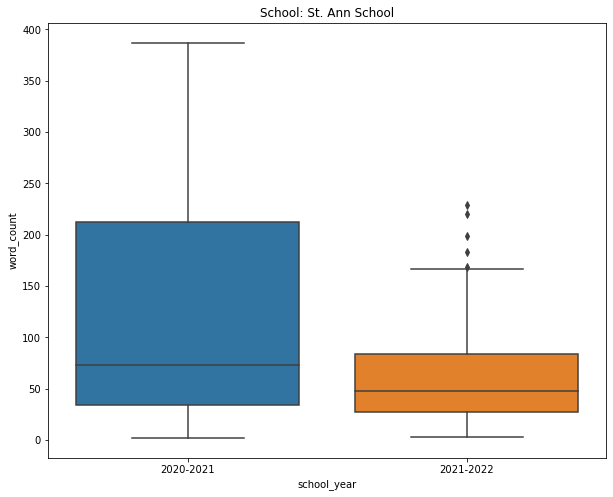

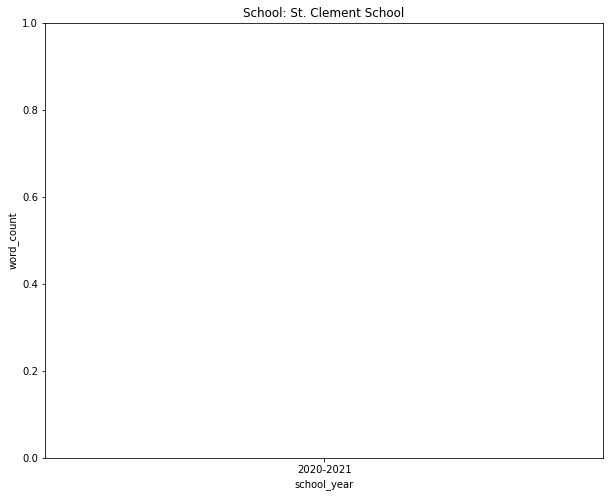

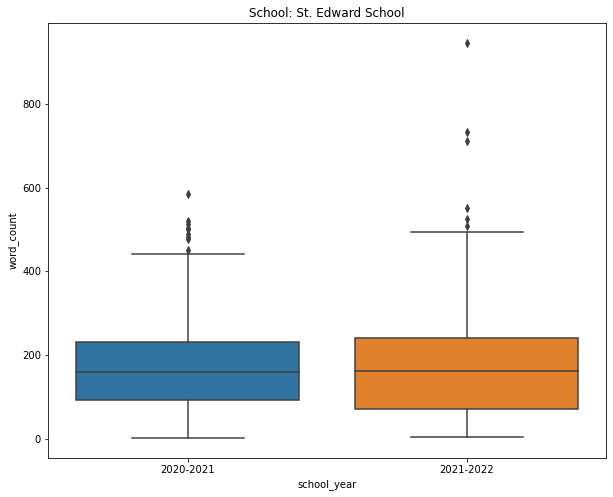

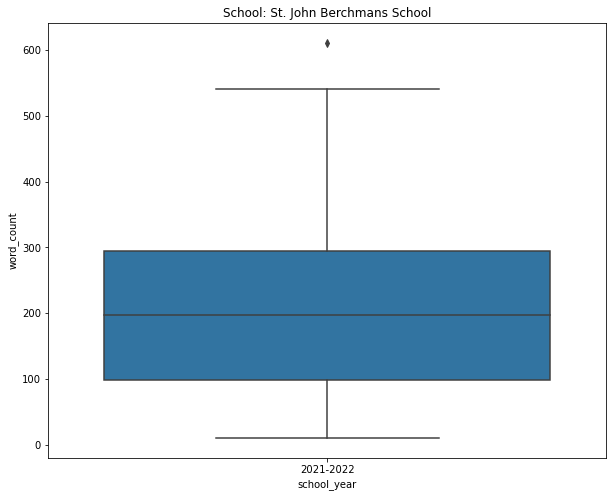

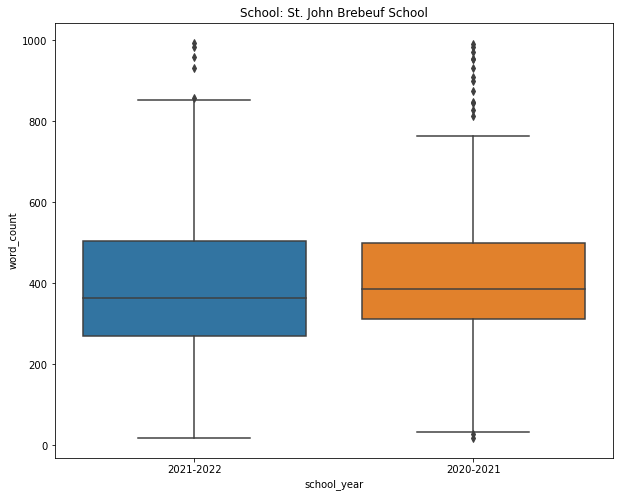

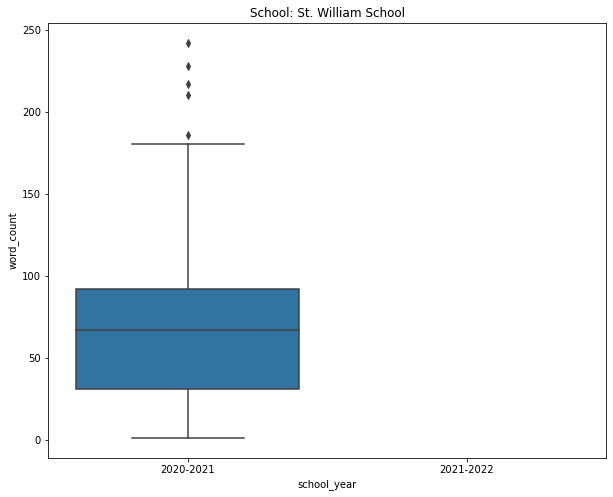

In [5]:
# boxplot: word count for all the schools in the district
plt.figure(figsize = (10,8))

sch = df.groupby('school_name')
sch = list(sch.groups)

for n in range(0,15): 
    plt.figure(figsize = (10,8))
    # choose the school
    inst = df[df['school_name']==sch[n]] 
    
    ax = sns.boxplot(x=inst['school_year'],y=inst['word_count'])
    ax.set_title("School: " + sch[n])
#     plt.savefig('/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/boxplot grade' + str(n) +'.png')
    plt.show()

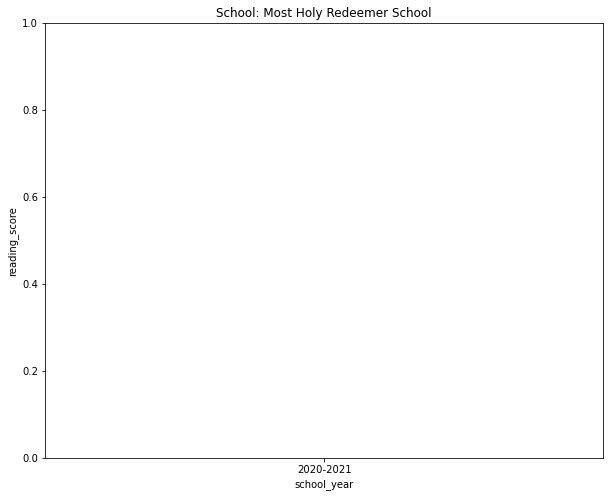

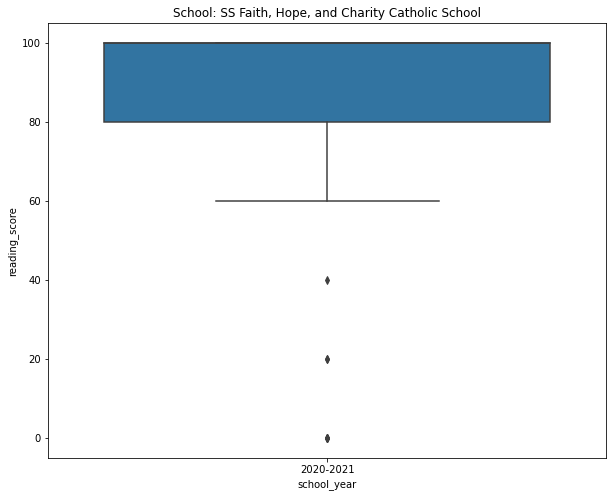

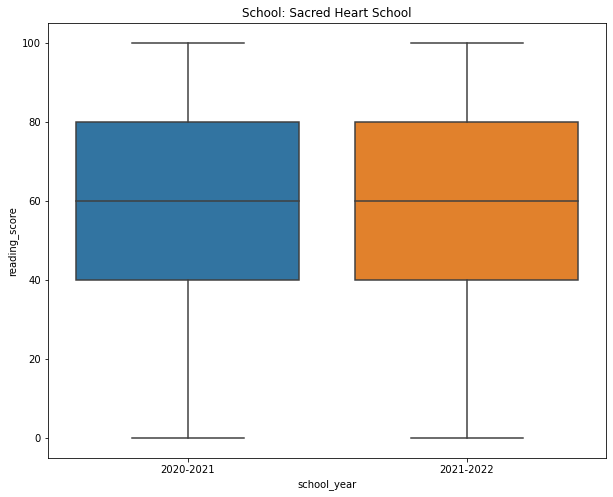

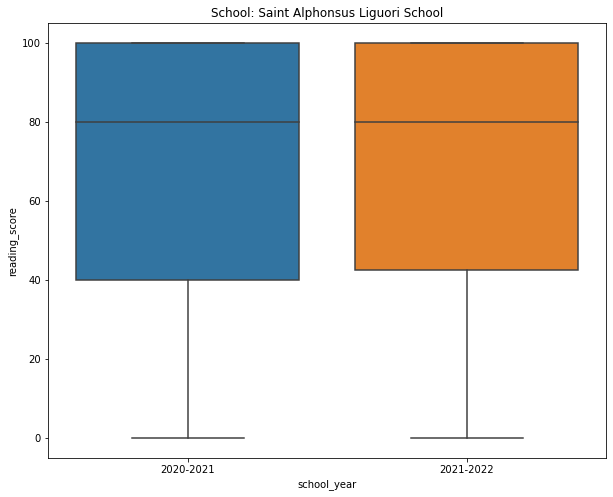

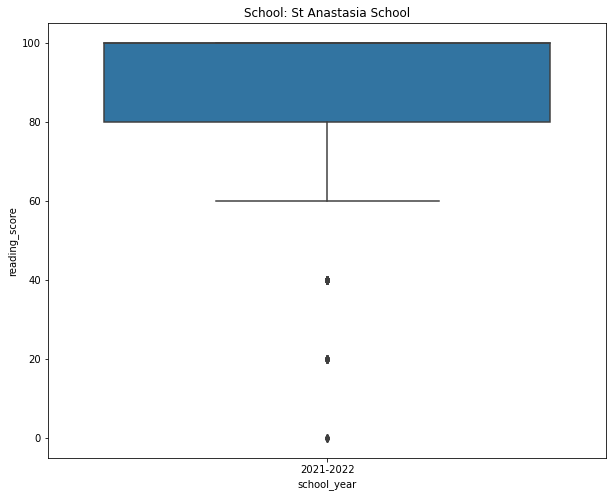

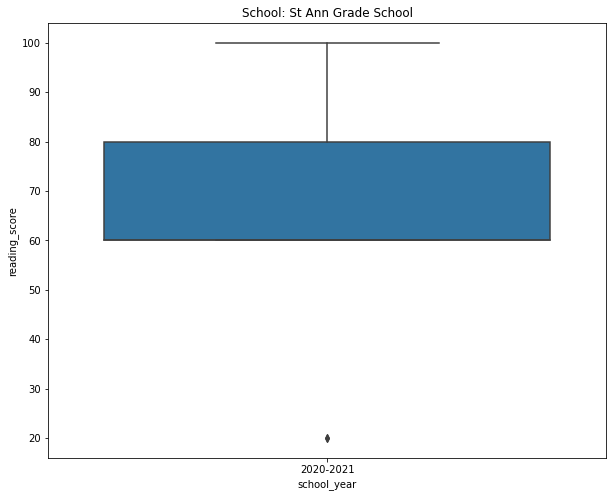

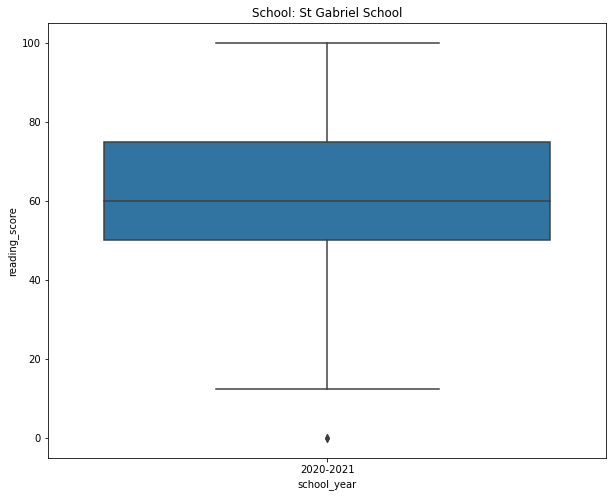

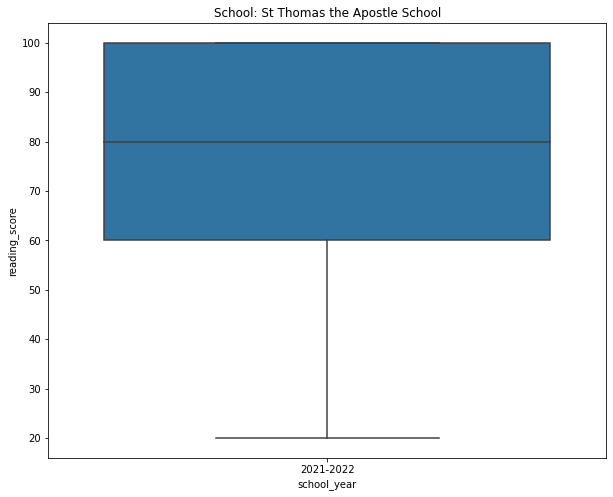

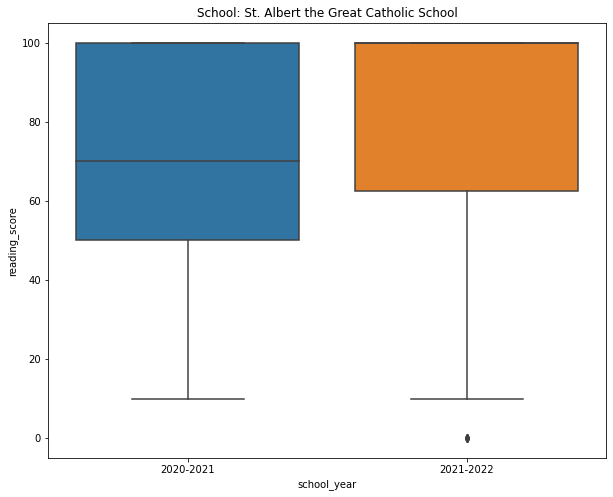

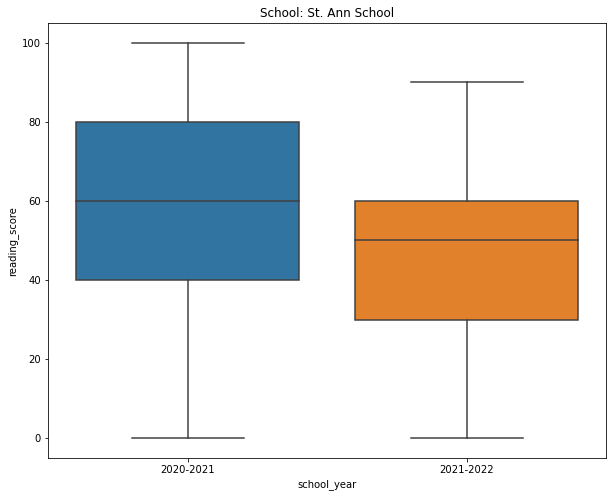

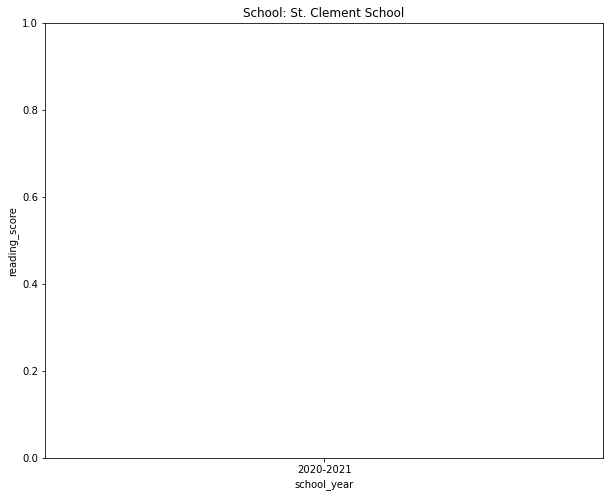

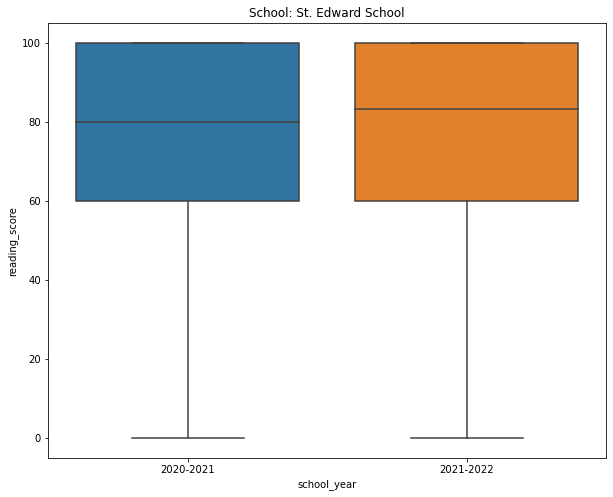

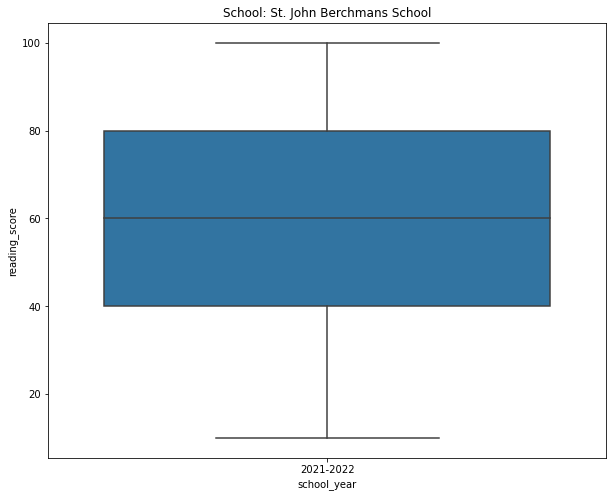

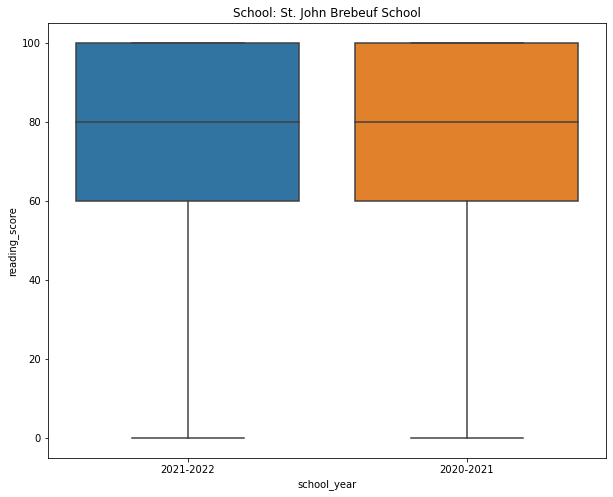

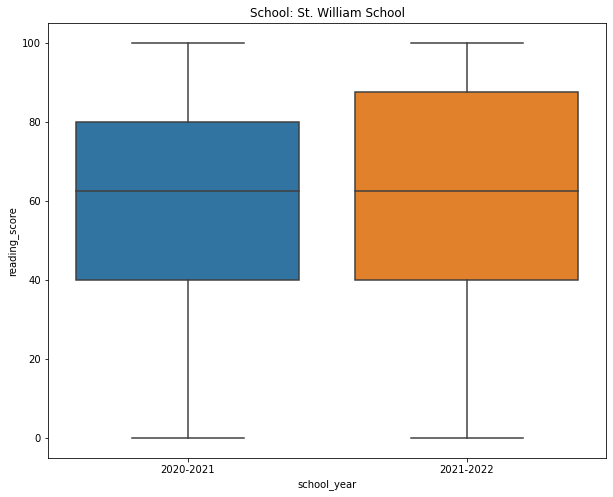

In [6]:
for n in range(0,15): 
    plt.figure(figsize = (10,8))
    # choose the school
    inst = df[df['school_name']==sch[n]] 
    
    ax = sns.boxplot(x=inst['school_year'],y=inst['reading_score'])
    ax.set_title("School: " + sch[n])
#     plt.savefig('/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/boxplot grade' + str(n) +'.png')
    plt.show()

## Scatterplot (usage vs. word count)

In [7]:
## word count
wc_left = df[df['word_count'].notna()].groupby(['student_id','student_name',
                                                'school_year','school_name','grade'])['num_lesson',
                                                                                      'num_graded_writing'].sum()
wc_right = df[df['word_count'].notna()].groupby(['student_id','student_name',
                                                 'school_year','school_name',
                                                 'grade'])['word_count'].mean()

wc_reg = pd.merge(wc_left, wc_right, on=['student_id','student_name','school_year',
                                         'school_name','grade'], how='inner')
wc_reg = wc_reg.reset_index()


## Reading score
rd_left = df[df['reading_score'].notna()].groupby(['student_id','student_name',
                                                   'school_year','school_name',
                                                   'grade'])['num_lesson','num_graded_writing'].sum()

rd_right = df[df['reading_score'].notna()].groupby(['student_id','student_name',
                                                    'school_year','school_name',
                                                    'grade'])['reading_score'].mean()

rd_reg = pd.merge(rd_left, rd_right, on=['student_id','student_name','school_year','school_name','grade'], how='inner')
rd_reg = rd_reg.reset_index()

In [8]:
wc_reg= wc_reg[wc_reg['school_year'] == '2021-2022']
rd_reg= rd_reg[rd_reg['school_year'] == '2021-2022']

In [9]:
# wc_reg.to_csv(os.path.join(path, 'Arch word count graphs.csv'))
# rd_reg.to_csv(os.path.join(path, 'Arch reading score graphs.csv'))

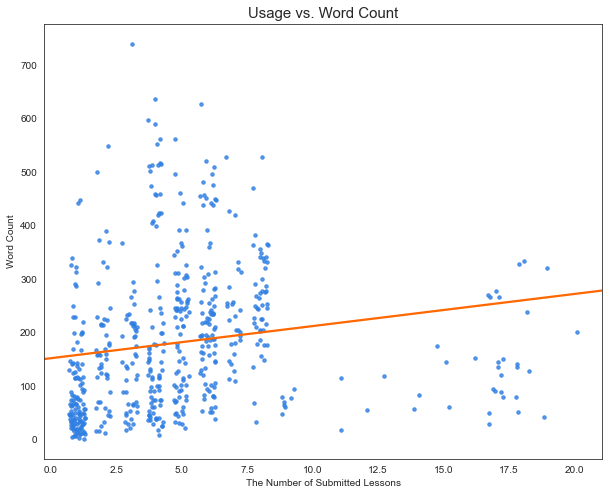

In [21]:
for n in range (1,2):
    sns.set_style(style='white')
    plt.figure(figsize = (10,8))
    sns.regplot(wc_reg['num_lesson'],wc_reg['word_count'], order = n,
                scatter_kws={"color": "#2f7fe2",'s':12}, truncate = False, x_jitter=.3,marker='o',
                line_kws={"color": "#ff6800"}, ci=None)
    plt.xlabel('The Number of Submitted Lessons')
    plt.ylabel('Word Count')
    plt.title("Usage vs. Word Count", fontsize=15)
#     plt.savefig(os.path.join(path,'Usage vs. Word Count (Order ' + str(n) +').png'))
    plt.show()

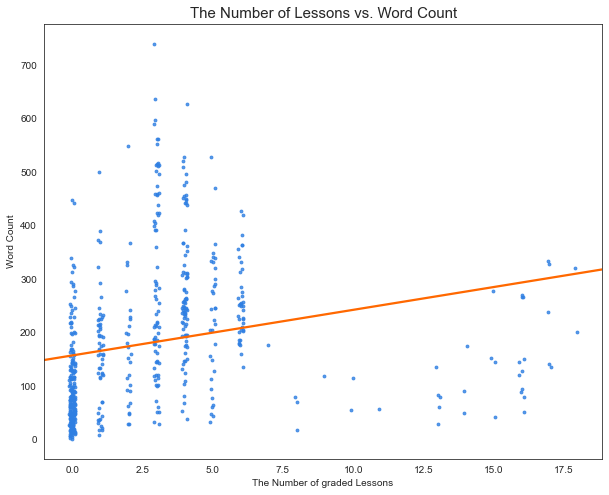

In [11]:
for n in range (1,2):
    sns.set_style(style='white')
    plt.figure(figsize = (10,8))
    sns.regplot(wc_reg['num_graded_writing'],wc_reg['word_count'], order = n,
                scatter_kws={"color": "#2f7fe2",'s':8}, truncate = False, x_jitter=.1,marker='o',
                line_kws={"color": "#ff6800"}, ci=None)
    plt.xlabel('The Number of graded Lessons')
    plt.ylabel('Word Count')
    plt.title("The Number of Lessons vs. Word Count", fontsize=15)
#     plt.savefig(os.path.join(path,'The Number of Assignments vs. MOY Writing Score (Order ' + str(n) +').png'))
    plt.show()

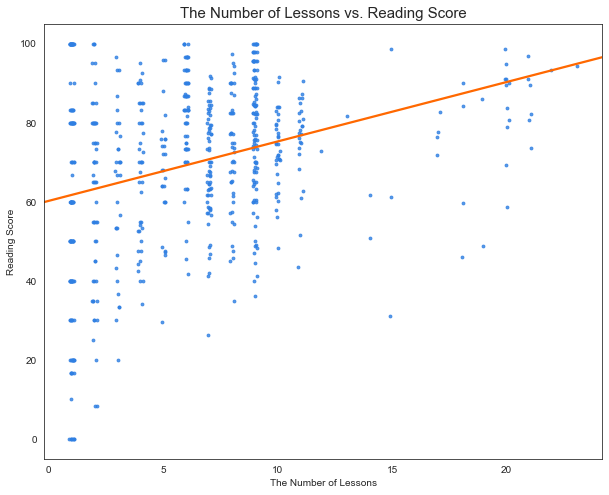

In [12]:
for n in range (1,2):
    sns.set_style(style='white')
    plt.figure(figsize = (10,8))
    sns.regplot(rd_reg['num_lesson'],rd_reg['reading_score'], order = n,
                scatter_kws={"color": "#2f7fe2",'s':8}, truncate = False, x_jitter=.1,marker='o',
                line_kws={"color": "#ff6800"}, ci=None)
    plt.xlabel('The Number of Lessons')
    plt.ylabel('Reading Score')
    plt.title("The Number of Lessons vs. Reading Score", fontsize=15)
#     plt.savefig(os.path.join(path,'The Number of Assignments vs. MOY Writing Score (Order ' + str(n) +').png'))
    plt.show()

In [23]:
## this part removes teacher name, which we should include them later 
## I commented out all the growth, because previously I remove 2020-2021, and from previous attempt, 
## growth does not show same results as just comparing all the datapoints 

In [24]:
# wc_reg_p = wc_reg.pivot_table(index=['school_name', 'student_name','student_id','grade'], 
#                               columns='school_year', values=['word_count','num_lesson'])

# wc_reg_p = wc_reg_p.reset_index()
# wc_reg_p = wc_reg_p.dropna()

# wc_reg_p['growth'] = wc_reg_p.iloc[:,8] - wc_reg_p.iloc[:,7]
# wc_reg_p['plusnumlsn'] = wc_reg_p.iloc[:,6] - wc_reg_p.iloc[:,5]

In [ ]:
# for n in range (1,2):
#     sns.set_style(style='white')
#     plt.figure(figsize = (10,8))
#     sns.regplot(wc_reg_p['plusnumlsn'],wc_reg_p['growth'], order = n,
#                 scatter_kws={"color": "#2f7fe2",'s':8}, truncate = False, x_jitter=.1,marker='o',
#                 line_kws={"color": "#ff6800"}, ci=None)
#     plt.xlabel('The Number of Lessons')
#     plt.ylabel('Word Count')
#     plt.title("The Number of Lessons vs. Word Count", fontsize=15)
# #     plt.savefig(os.path.join(path,'The Number of Assignments vs. MOY Writing Score (Order ' + str(n) +').png'))
#     plt.show()

In [ ]:
# rd_reg_p = rd_reg.pivot_table(index=['school_name', 'student_name','student_id','grade','teacher_name'], 
#                                 columns='school_year', values=['reading_score','num_lesson'])

# rd_reg_p = rd_reg_p.reset_index()
# rd_reg_p = rd_reg_p.dropna()

# rd_reg_p['growth'] = rd_reg_p.iloc[:,8] - rd_reg_p.iloc[:,7]
# rd_reg_p['plusnumlsn'] = rd_reg_p.iloc[:,6] - rd_reg_p.iloc[:,5]

In [ ]:
# for n in range (1,2):
#     sns.set_style(style='white')
#     plt.figure(figsize = (10,8))
#     sns.regplot(rd_reg_p['plusnumlsn'],rd_reg_p['growth'], order = n,
#                 scatter_kws={"color": "#2f7fe2",'s':8}, truncate = False, x_jitter=.1,marker='o',
#                 line_kws={"color": "#ff6800"}, ci=None)
#     plt.xlabel('The Number of Lessons')
#     plt.ylabel('Word Count')
#     plt.title("The Number of Lessons vs. Word Count", fontsize=15)
# #     plt.savefig(os.path.join(path,'The Number of Assignments vs. MOY Writing Score (Order ' + str(n) +').png'))
#     plt.show()

### Albert

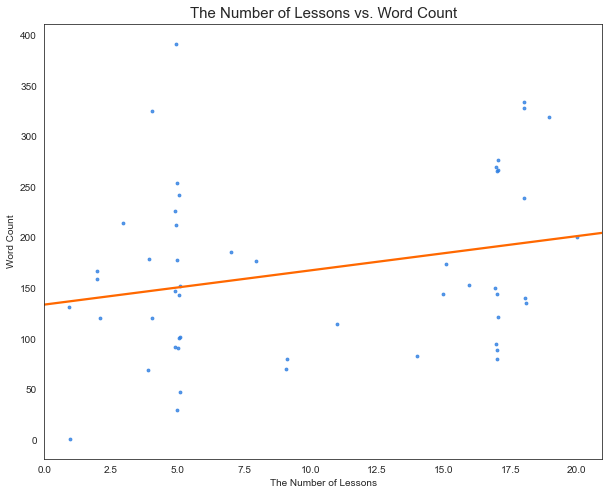

In [26]:
subset1 = wc_reg[wc_reg['school_name'].str.contains('Albert')]
subset1 = subset1[subset1['word_count'] <= 400]# remove outlier

sns.set_style(style='white')
plt.figure(figsize = (10,8))
sns.regplot(subset1['num_lesson'],subset1['word_count'], order = 1,
            scatter_kws={"color": "#2f7fe2",'s':8}, truncate = False, x_jitter=.1,marker='o',
            line_kws={"color": "#ff6800"}, ci=None)
plt.xlabel('The Number of Lessons')
plt.ylabel('Word Count')
plt.title("The Number of Lessons vs. Word Count", fontsize=15)
#     plt.savefig(os.path.join(path,'The Number of Assignments vs. MOY Writing Score (Order ' + str(n) +').png'))
plt.show()

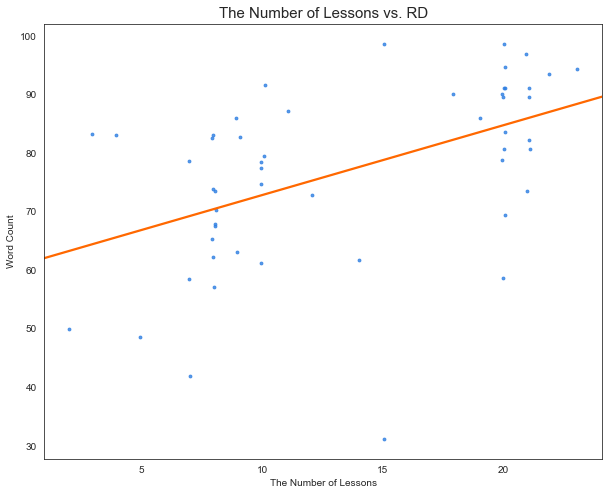

In [27]:
subset1_rd = rd_reg[rd_reg['school_name'].str.contains('Albert')]

sns.set_style(style='white')
plt.figure(figsize = (10,8))
sns.regplot(subset1_rd['num_lesson'],subset1_rd['reading_score'], order = 1,
            scatter_kws={"color": "#2f7fe2",'s':8}, truncate = False, x_jitter=.1,marker='o',
            line_kws={"color": "#ff6800"}, ci=None)
plt.xlabel('The Number of Lessons')
plt.ylabel('Word Count')
plt.title("The Number of Lessons vs. RD", fontsize=15)
#     plt.savefig(os.path.join(path,'The Number of Assignments vs. MOY Writing Score (Order ' + str(n) +').png'))
plt.show()

### Anastasia

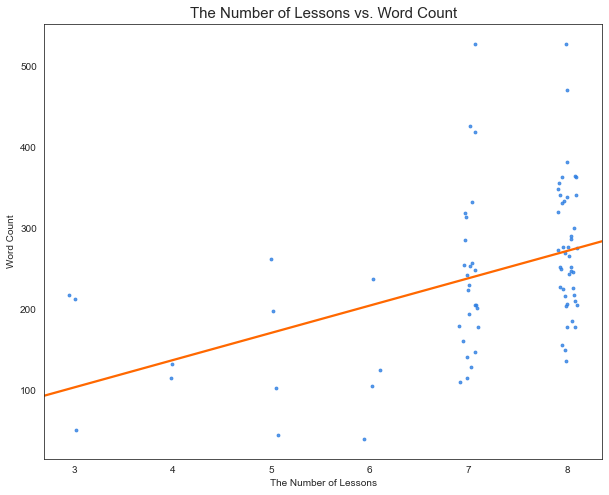

In [28]:
subset2 = wc_reg[wc_reg['school_name'].str.contains('Anastasia')]
subset2 = subset2[subset2['word_count'] <= 600]# remove outlier

sns.set_style(style='white')
plt.figure(figsize = (10,8))
sns.regplot(subset2['num_lesson'],subset2['word_count'], order = 1,
            scatter_kws={"color": "#2f7fe2",'s':8}, truncate = False, x_jitter=.1,marker='o',
            line_kws={"color": "#ff6800"}, ci=None)
plt.xlabel('The Number of Lessons')
plt.ylabel('Word Count')
plt.title("The Number of Lessons vs. Word Count", fontsize=15)
#     plt.savefig(os.path.join(path,'The Number of Assignments vs. MOY Writing Score (Order ' + str(n) +').png'))
plt.show()

### John Brebeuf

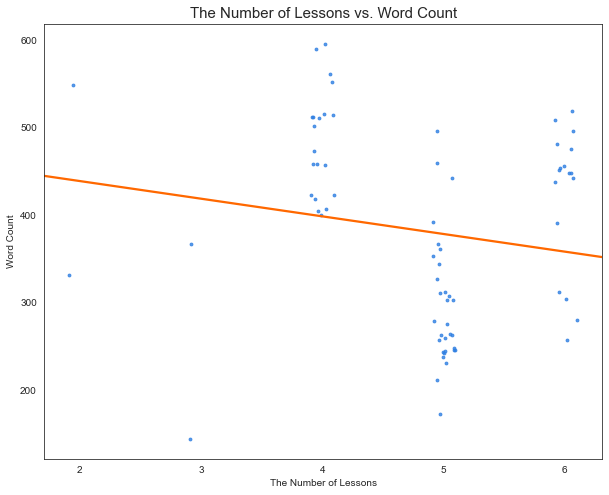

In [29]:
subset2 = wc_reg[wc_reg['school_name'].str.contains('John Brebeuf')]
subset2 = subset2[subset2['word_count'] <= 600]# remove outlier

sns.set_style(style='white')
plt.figure(figsize = (10,8))
sns.regplot(subset2['num_lesson'],subset2['word_count'], order = 1,
            scatter_kws={"color": "#2f7fe2",'s':8}, truncate = False, x_jitter=.1,marker='o',
            line_kws={"color": "#ff6800"}, ci=None)
plt.xlabel('The Number of Lessons')
plt.ylabel('Word Count')
plt.title("The Number of Lessons vs. Word Count", fontsize=15)
#     plt.savefig(os.path.join(path,'The Number of Assignments vs. MOY Writing Score (Order ' + str(n) +').png'))
plt.show()